<p><a id = 2.1></a></p>
<h3><b>2.1 | <span style="color:#276FBF">Importing Libraries</span></b></h3>

In [1]:
#Basic Libraries
import pandas as pd
import numpy as np
import pickle

#Visualizations Libraries
import matplotlib.pyplot as plt
import seaborn as sns

#Model Libraries
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

#Pre-Processing Libraries
#from imblearn.combine import SMOTEENN
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import SimpleImputer

#Evaluation Libraies
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.dummy import DummyClassifier
from sklearn.inspection import permutation_importance
from flask import Flask, jsonify

#Warnings
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [2]:
#Importing the dataset
telco_customer_churn = pd.read_csv('usage.csv')

<p><a id = 2.3></a></p>
<h3 tabindex="0"><b>2.3 | <span style="color:#276FBF">Dataset Information</span></b></h3>

In [3]:
telco_customer_churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


This dataset contains 7043 Rows and 21 Columns

1. __Customers usage pattens within the last month__ – the column is called Prediction
2. __Services that each customer has signed up for__ – phone, multiple lines, internet, online security, online backup, device protection, tech support, and streaming TV and movies
3. __Customer account information__ – how long they’ve been a customer, contract, payment method, paperless billing, monthly charges, and total charges
Demographic info about customers – gender, age range, and if they have partners and dependents

In [4]:
telco_customer_churn.drop('customerID', axis = 1, inplace = True)

In [5]:
telco_customer_churn['TotalCharges'] = pd.to_numeric(telco_customer_churn['TotalCharges'], errors='coerce')

<p><a id = 3.3></a></p>
<h3 tabindex="0"><b>3.3 | <span style="color:#276FBF">Checking for Missing Values</span></b></h3>

In [6]:
print(f'Number of NaN in each row:\n\n{telco_customer_churn.isna().sum()}')

Number of NaN in each row:

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64


<p><a id = 3.4></a></p>
<h3 tabindex="0"><b>3.4 | <span style="color:#276FBF">Handling Missing Values</span></b></h3>

In [7]:
telco_customer_churn = telco_customer_churn.dropna()

In [8]:
print(f'Number of NaN in each row:\n\n{telco_customer_churn.isna().sum()}')

Number of NaN in each row:

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


In [9]:
telco_customer_churn.describe

<bound method NDFrame.describe of       gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0     Female              0     Yes         No       1           No   
1       Male              0      No         No      34          Yes   
2       Male              0      No         No       2          Yes   
3       Male              0      No         No      45           No   
4     Female              0      No         No       2          Yes   
...      ...            ...     ...        ...     ...          ...   
7038    Male              0     Yes        Yes      24          Yes   
7039  Female              0     Yes        Yes      72          Yes   
7040  Female              0     Yes        Yes      11           No   
7041    Male              1     Yes         No       4          Yes   
7042    Male              0      No         No      66          Yes   

         MultipleLines InternetService OnlineSecurity OnlineBackup  \
0     No phone service             DSL     

In [10]:
telco_customer_churn.describe

<bound method NDFrame.describe of       gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0     Female              0     Yes         No       1           No   
1       Male              0      No         No      34          Yes   
2       Male              0      No         No       2          Yes   
3       Male              0      No         No      45           No   
4     Female              0      No         No       2          Yes   
...      ...            ...     ...        ...     ...          ...   
7038    Male              0     Yes        Yes      24          Yes   
7039  Female              0     Yes        Yes      72          Yes   
7040  Female              0     Yes        Yes      11           No   
7041    Male              1     Yes         No       4          Yes   
7042    Male              0      No         No      66          Yes   

         MultipleLines InternetService OnlineSecurity OnlineBackup  \
0     No phone service             DSL     

In [11]:
telco_customer_churn.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [12]:
#Convert categorial features to binary matrix (dummy variable)
telco_customer_churn_dummies = pd.get_dummies(telco_customer_churn, drop_first = True)

# Rename Churn_yes to Churn
telco_customer_churn_dummies.rename(columns = {'Churn_Yes': 'Churn'}, inplace = True)

<p><a id = 4></a></p>
<div style="padding:20px;
            color:black;
            margin:10;
            font-size:170%;
            text-align:left;
            display:fill;
            border-radius:5px;
            background-color:#C9E4DE;
            overflow:hidden;
            font-weight:700"><span style = 'color:black'>4</span> <span style="color:#276FBF">|</span> Exploratory Data Analysis</div>

In [13]:
for col in telco_customer_churn.columns:
    if telco_customer_churn[col].dtype != 'int64' and telco_customer_churn[col].dtype != 'float64':
        print(f'{col}: {telco_customer_churn[col].unique()}')

gender: ['Female' 'Male']
Partner: ['Yes' 'No']
Dependents: ['No' 'Yes']
PhoneService: ['No' 'Yes']
MultipleLines: ['No phone service' 'No' 'Yes']
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: ['No' 'Yes' 'No internet service']
OnlineBackup: ['Yes' 'No' 'No internet service']
DeviceProtection: ['No' 'Yes' 'No internet service']
TechSupport: ['No' 'Yes' 'No internet service']
StreamingTV: ['No' 'Yes' 'No internet service']
StreamingMovies: ['No' 'Yes' 'No internet service']
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: ['Yes' 'No']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn: ['No' 'Yes']


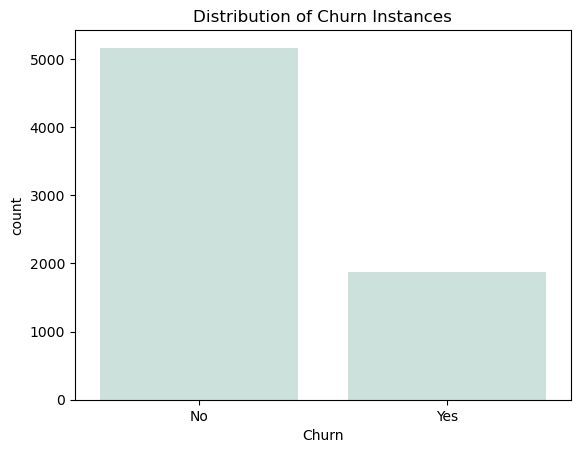

In [14]:
sns.countplot(x = telco_customer_churn['Churn'], color = '#C9E4DE')
plt.title('Distribution of Churn Instances')
plt.show()

<div style = 'background-color:#ffeedd;text-align:left; padding: 13px 13px; border-radius: 8px; color: black'>
    The target is slightly unbalanced, there are more instances of <b>'No'</b> to <b>'Yes'</b>
</div>


<p><a id = 4.3></a></p>
<h3 tabindex="0"><b>4.3 | <span style="color:#276FBF">Numerical Features</span></b></h3>

- Tenure
- Monthly Charges
- Total Charges

In [15]:
def numericalKde(feature):
    plt.figure(figsize=(11, 4))
    plt.title("KDE for {}".format(feature))
    ax1 = sns.kdeplot(telco_customer_churn[telco_customer_churn['Churn']== 'No'][feature].dropna(), color = '#C9E4DE', label = 'Churn: No')
    ax2 = sns.kdeplot(telco_customer_churn[telco_customer_churn['Churn']== 'Yes'][feature].dropna(), color = '#fec3a6', label = 'Churn: Yes')
    plt.legend()

In [16]:
<p><a id = 4.3.1></a></p>
<h4 tabindex="0"><b>4.3.1 | <span style="color:#276FBF">KDE for Tenure</span></b></h4>

SyntaxError: invalid syntax (1397079095.py, line 1)

In [ ]:
numericalKde('tenure')

<p><a id = 4.3.2></a></p>
<h4 tabindex="0"><b>4.3.2 | <span style="color:#276FBF">KDE for Monthly Charges</span></b></h4>

In [ ]:
numericalKde('MonthlyCharges')

<p><a id = 4.3.3></a></p>
<h4 tabindex="0"><b>4.3.3 | <span style="color:#276FBF">KDE for Total Charges</span></b></h4>

In [ ]:
numericalKde('TotalCharges')

<p><a id = 4.3.4></a></p>
<h4 tabindex="0"><b>4.3.4 | <span style="color:#276FBF">Numerical Features Summary</span></b></h4>

<div style = 'background-color:#ffeedd;text-align:left; padding: 13px 13px; border-radius: 8px; color: black'>
    <ul>
        <li>The longer the users has been using the communication network, the less likely they will churn</li>
        <li>Users with higher monthly charges are more likely to churn</li>
    </ul>
</div>

<p><a id = 4.4></a></p>
<h3 tabindex="0"><b>4.4 | <span style="color:#276FBF">Categorical Features</span></b></h3>

In [ ]:
def categoricalBar(feature, ax):
    sns.countplot(x=feature, hue='Churn', data=telco_customer_churn, ax=ax, palette=['#C9E4DE', '#fec3a6'])
    ax.set_title(f'Count of Churn by {feature}')
    ax.set_xlabel(feature)
    ax.set_ylabel('Count')

<p><a id = 4.4.1></a></p>
<h4 tabindex="0"><b>4.4.1 | <span style="color:#276FBF">Customer Information</span></b></h4>

- Gender
- Senior Citizen
- Partner
- Dependents

In [ ]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(22, 12))
categoricalBar('gender',ax1)
categoricalBar('SeniorCitizen',ax2)
categoricalBar('Partner',ax3)
categoricalBar('Dependents',ax4)

fig.suptitle('Count of Churn by Customer Information', fontsize=20, fontweight = 'bold')
plt.tight_layout()
plt.show()

<p><a id = 4.4.2></a></p>
<h4 tabindex="0"><b>4.4.2 | <span style="color:#276FBF">General Services</span></b></h4>

- Phone Service
- Multiple Lines
- Internet Service
- Streaming TV
- Streaming Movies

In [ ]:
fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(1,5, figsize=(22, 10))
categoricalBar('PhoneService',ax1)
categoricalBar('MultipleLines',ax2)
categoricalBar('InternetService',ax3)
categoricalBar('StreamingTV',ax4)
categoricalBar('StreamingMovies',ax5)

fig.suptitle('Count of Churn by General Services', fontsize=20, fontweight = 'bold')
plt.tight_layout()
plt.show()

<p><a id = 4.4.3></a></p>
<h4 tabindex="0"><b>4.4.3 | <span style="color:#276FBF">Support Services</span></b></h4>

- Online Security
- Online Backup
- Device Protection
- Tech Support

In [ ]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(22, 12))
categoricalBar('OnlineSecurity',ax1)
categoricalBar('OnlineBackup',ax2)
categoricalBar('DeviceProtection',ax3)
categoricalBar('TechSupport',ax4)

fig.suptitle('Count of Churn by Support Services', fontsize=20, fontweight = 'bold')
plt.tight_layout()
plt.show()

<p><a id = 4.4.4></a></p>
<h4 tabindex="0"><b>4.4.4 | <span style="color:#276FBF">Payments</span></b></h4>

- Contract
- Paperless Billing
- Payment Method

In [ ]:
fig, (ax1, ax2,ax3) = plt.subplots(1,3, figsize=(22, 7))
categoricalBar('Contract',ax1)
categoricalBar('PaperlessBilling',ax2)
categoricalBar('PaymentMethod',ax3)

fig.suptitle('Count of Churn by Payments', fontsize=20, fontweight = 'bold')
plt.tight_layout()
plt.show()

<p><a id = 4.4.5></a></p>
<h4 tabindex="0"><b>4.4.5 | <span style="color:#276FBF">Categorical Features Summary</span></b></h4>

<div style = 'background-color:#ffeedd;text-align:left; padding: 13px 13px; border-radius: 8px; color: black'>
    <ul>
        <li>Users who do not subscribe to notice provision are more likely to churn</li>
        <li>Users classified in low limit usage catergory are more likely to churn</li>
        <li>Users classified in medium usage limit catergory are more likely to churn after the low limit catergory</li>
        <li>Users classified in high usage limit catergory are more likely to churn lastly</li>
    </ul>
</div>

<p><a id = 4.5></a></p>
<h3 tabindex="0"><b>4.5 | <span style="color:#276FBF">Correlation Heatmap</span></b></h3>

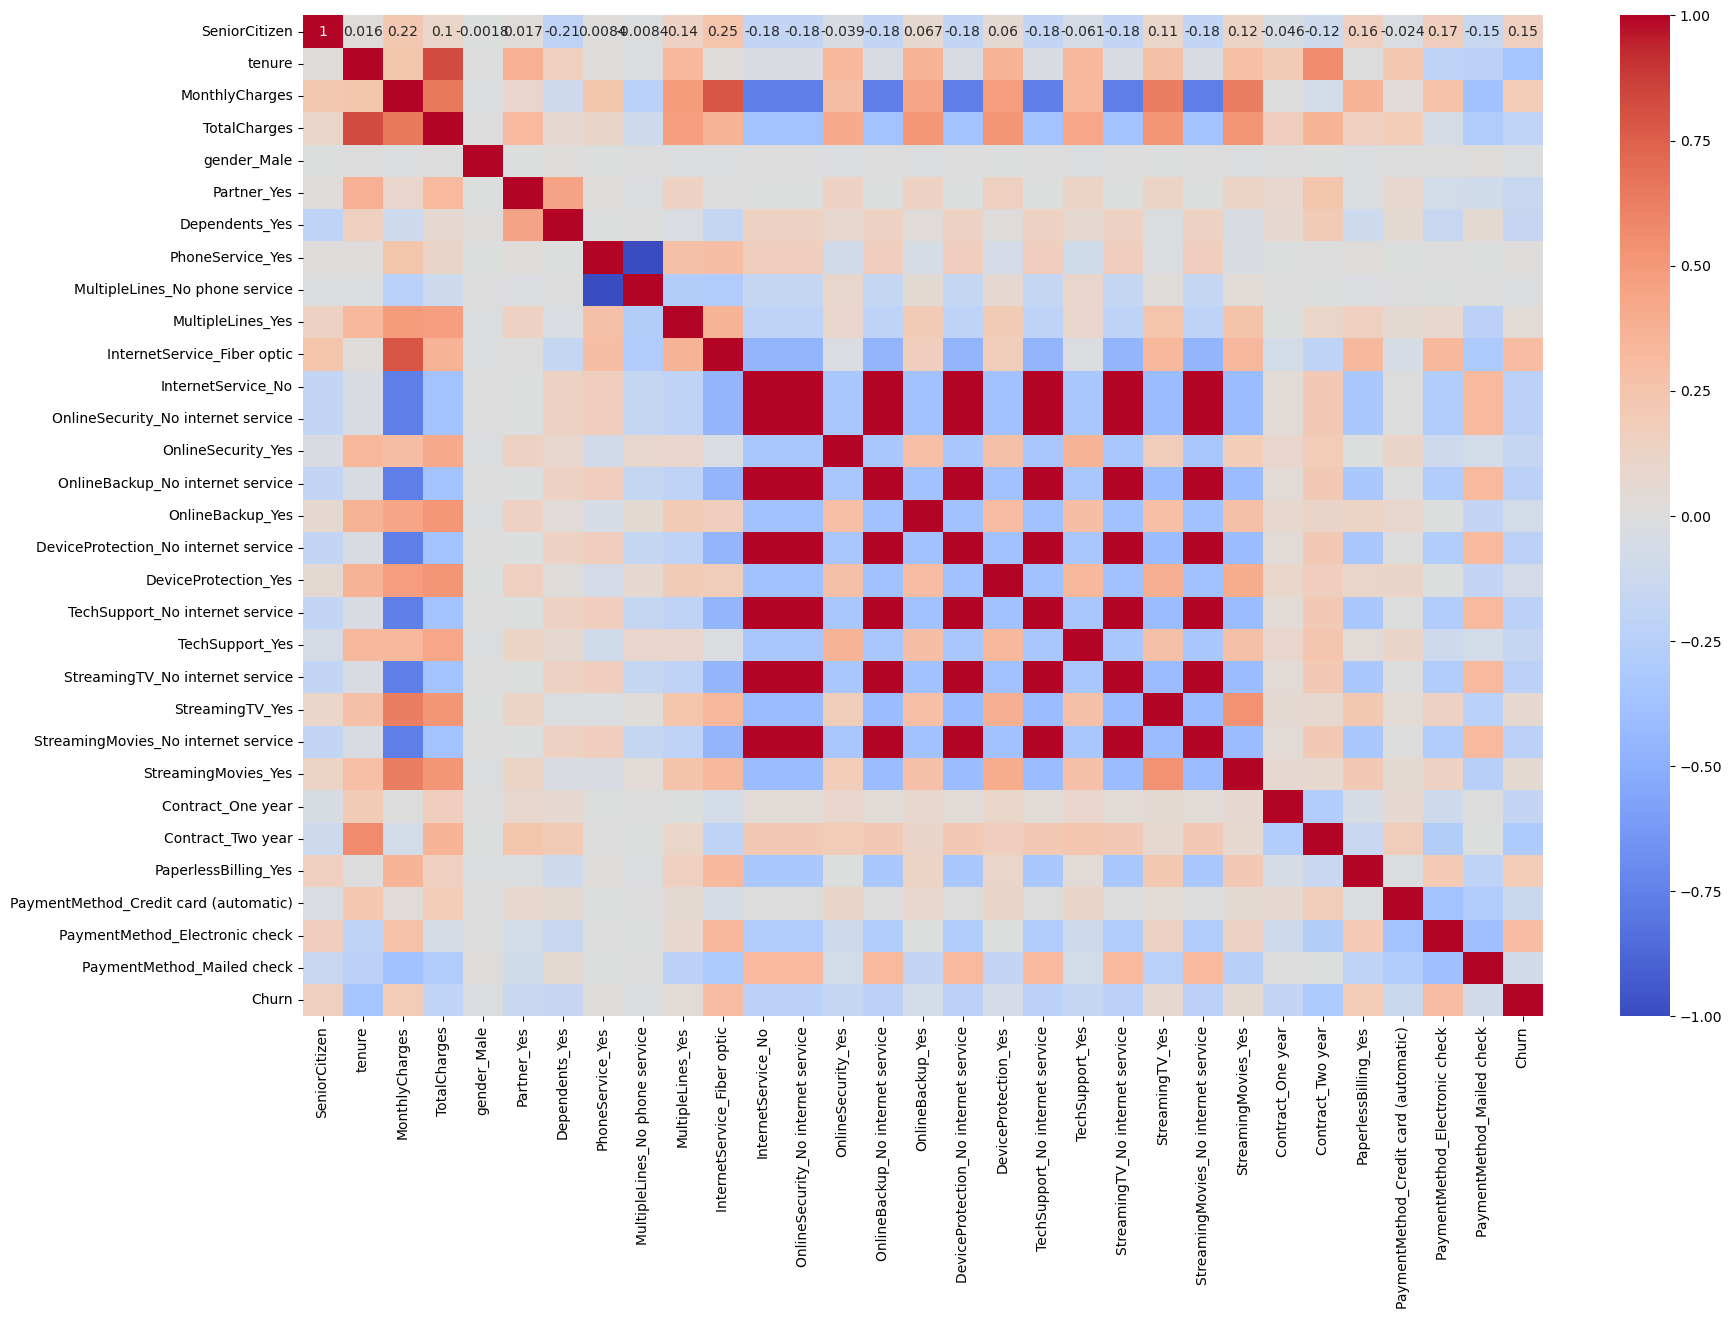

In [17]:
plt.figure(figsize=(20, 13)) 
sns.heatmap(telco_customer_churn_dummies.corr(), annot=True, cmap = 'coolwarm')
plt.show()

<p><a id = 5></a></p>
<div style="padding:20px;
            color:black;
            margin:10;
            font-size:170%;
            text-align:left;
            display:fill;
            border-radius:5px;
            background-color:#C9E4DE;
            overflow:hidden;
            font-weight:700"><span style = 'color:black'>5</span> <span style="color:#276FBF">|</span> Feature Engineering</div>

<p><a id = 5.1></a></p>
<h3 tabindex="0"><b>5.1 | <span style="color:#276FBF">Define Features and Target Variable</span></b></h3>

In [ ]:
# Variables
X = telco_customer_churn_dummies.iloc[:, :-1]
y = telco_customer_churn_dummies.iloc[:,-1]

<p><a id = 5.2></a></p>
<h3 tabindex="0"><b>5.2 | <span style="color:#276FBF">Train Test Split</span></b></h3>

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.20, random_state = 42)

<p><a id = 5.3></a></p>
<h3 tabindex="0"><b>5.3 | <span style="color:#276FBF">Feature Scaling</span></b></h3>


In [ ]:
scaler = MinMaxScaler()
scaler.fit(X_train)

X_train = pd.DataFrame(scaler.transform(X_train), columns = X.columns)
X_test = pd.DataFrame(scaler.transform(X_test), columns = X.columns)

<p><a id = 6></a></p>
<div style="padding:20px;
            color:black;
            margin:10;
            font-size:170%;
            text-align:left;
            display:fill;
            border-radius:5px;
            background-color:#C9E4DE;
            overflow:hidden;
            font-weight:700"><span style = 'color:black'>6</span> <span style="color:#276FBF">|</span> Model Selection</div>

<p><a id = 6.1></a></p>
<h3 tabindex="0"><b>6.1 | <span style="color:#276FBF">Base Models</span></b></h3>

<p><a id = 6.1.1></a></p>
<h4 tabindex="0"><b>6.1.1 | <span style="color:#276FBF">Base Model: Random Forest Classifier</span></b></h4>

In [ ]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

#Prediction
y_pred_rf = rf.predict(X_test)

#Accuracy
rf_accuracy = rf.score(X_test, y_test)

#Classification Report
rf_classification_report = classification_report(y_test, y_pred_rf)

print(f'Random Forest Classifier: {rf_accuracy:.2f}\n')
print(f'Classification Report for Random Forest Classifier:\n{rf_classification_report}')

#Confusion Matrix
cm_rf = confusion_matrix(y_test, y_pred_rf)
display_rf = ConfusionMatrixDisplay(confusion_matrix = cm_rf)
display_rf.plot()
plt.title('Confusion Matrix for Random Forest Classifier')
plt.show()

<p><a id = 6.1.3></a></p>
<h4 tabindex="0"><b>6.1.3 | <span style="color:#276FBF">Base Model: Decision Tree Classifier</span></b></h4>

In [ ]:
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

#Prediction
y_pred_dt = dt.predict(X_test)

#Accuracy
dt_accuracy = dt.score(X_test, y_test)

#Classification Report
dt_classification_report = classification_report(y_test, y_pred_dt)

print(f'Decision Tree Classifier: {dt_accuracy:.2f}\n')
print(f'Classification Report for Decision Tree Classifier:\n{dt_classification_report}')

#Confusion Matrix
cm_dt = confusion_matrix(y_test, y_pred_dt)
display_dt = ConfusionMatrixDisplay(confusion_matrix = cm_dt)
display_dt.plot()
plt.title('Confusion Matrix for Decision Tree Classifier')
plt.show()

<p><a id = 6.1.4></a></p>
<h4 tabindex="0"><b>6.1.4 | <span style="color:#276FBF">Base Model: SVC</span></b></h4>

In [ ]:
svc = SVC()
svc.fit(X_train, y_train)

#Prediction
y_pred_svc = svc.predict(X_test)

#Accuracy
svc_accuracy = svc.score(X_test, y_test)

#Classification Report
svc_classification_report = classification_report(y_test, y_pred_svc)

print(f'SVC: {svc_accuracy:.2f}\n')
print(f'Classification Report for SVC:\n{svc_classification_report}')

#Confusion Matrix
cm_svc = confusion_matrix(y_test, y_pred_svc)
display_svc = ConfusionMatrixDisplay(confusion_matrix = cm_svc)
display_svc.plot()
plt.title('Confusion Matrix for SVC')
plt.show()

<p><a id = 6.1.5></a></p>
<h4 tabindex="0"><b>6.1.5 | <span style="color:#276FBF">Base Model: Naive Bayes</span></b></h4>

In [ ]:
nb = GaussianNB()
nb.fit(X_train, y_train)

#Prediction
y_pred_nb = nb.predict(X_test)

#Accuracy
nb_accuracy = nb.score(X_test, y_test)

#Classification Report
nb_classification_report = classification_report(y_test, y_pred_nb)

print(f'Naive Bayes: {nb_accuracy:.2f}\n')
print(f'Classification Report for Naive Bayes:\n{nb_classification_report}')

#Confusion Matrix
cm_nb = confusion_matrix(y_test, y_pred_nb)
display_nb = ConfusionMatrixDisplay(confusion_matrix = cm_nb)
display_nb.plot()
plt.title('Confusion Matrix for Naive Bayes')
plt.show()

<p><a id = 6.1.6></a></p>
<h4 tabindex="0"><b>6.1.6 | <span style="color:#276FBF">Base Model: Gradient Boosting Classifier</span></b></h4>

In [ ]:
gb = GradientBoostingClassifier()
gb.fit(X_train, y_train)

#Prediction
y_pred_gb = gb.predict(X_test)

#Accuracy
gb_accuracy = gb.score(X_test, y_test)

#Classification Report
gb_classification_report = classification_report(y_test, y_pred_gb)

print(f'Gradient Boosting Classifier: {gb_accuracy:.2f}\n')
print(f'Classification Report for Gradient Boosting Classifier:\n{gb_classification_report}')

#Confusion Matrix
cm_gb = confusion_matrix(y_test, y_pred_gb)
display_gb = ConfusionMatrixDisplay(confusion_matrix = cm_gb)
display_gb.plot()
plt.title('Confusion Matrix for Gradient Boosting Classifier')
plt.show()

<p><a id = 6.2></a></p>
<h3 tabindex="0"><b>6.2 | <span style="color:#276FBF">Base Models Result Comparison</span></b></h3>

In [ ]:
accuracies = [['Random Forest Classifier',rf_accuracy],
              ['Decision Tree Classifier',dt_accuracy],
              ['SVC',svc_accuracy],
              ['Naive Bayes',nb_accuracy],
              ['Gradient Boosting Classifier',gb_accuracy]]

accuracies_df = pd.DataFrame(accuracies, columns = ['Model','Accuracy'])

plt.figure(figsize=(11, 5)) 
plt.bar(accuracies_df['Model'], accuracies_df['Accuracy'], color = '#C9E4DE')
plt.xticks(rotation=45)
plt.title('Accuracy of Base Models')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.show()

<p><a id = 6.3></a></p>
<h3 tabindex="0"><b>6.3 | <span style="color:#276FBF">K-Fold</span></b></h3>

In [ ]:
kf = KFold(n_splits = 5, shuffle = True, random_state = 42)

<p><a id = 6.4></a></p>
<h3 tabindex="0"><b>6.4 | <span style="color:#276FBF">Hyperparameter Tuning Selected Models</span></b></h3>

<p><a id = 6.4.2></a></p>
<h4 tabindex="0"><b>6.4.2 | <span style="color:#276FBF">Hyperparameter Tunning Gradient Boosting Classifier</span></b></h4>

In [ ]:
gb_params = {
    'n_estimators': [100, 150],
    'learning_rate': [0.05, 0.1],      
    'max_depth': [3, 4]
}

grid_gb = GridSearchCV(gb, gb_params, cv = kf)
grid_gb.fit(X_train, y_train)

# Getting the best parameters
gb_best_params = grid_gb.best_params_

#Predicting with the best parameters
y_pred_grid_gb = grid_gb.predict(X_test)

#Train and test scores
grid_gb_score_train = grid_gb.score(X_train, y_train)
grid_gb_score_test = grid_gb.score(X_test, y_test)

#Classification report
report_result_grid_gb = classification_report(y_test, y_pred_grid_gb)

#Cross Validation (On the whole dataset)
cv_result_grid_gb = cross_val_score(grid_gb, X,y,cv = kf)

print(f'Gradient Boosting Classifier score for TRAIN data: {grid_gb_score_train:.2f}')
print(f'Gradient Boosting Classifier score for TEST data: {grid_gb_score_test:.2f}')
print(f'Best Params for Gradient Boosting Classifier is:\n{gb_best_params}')
print(f'Classification report for Gradient Boosting Classifier after Hypertunning\n{report_result_grid_gb}')
print(f'Results of KFold Cross Validations of 5 folds for Gradient Boosting Classifier:\n{cv_result_grid_gb}\nMean Results of KFold Cross Validations of 5 folds for Gradient Boosting Classifier:\n{cv_result_grid_gb.mean()}')

#Confusion matrix
cm_grid_gb = confusion_matrix(y_test, y_pred_grid_gb)
display_grid_gb = ConfusionMatrixDisplay(confusion_matrix = cm_grid_gb)
display_grid_gb.plot()
plt.title('Confusion Matrix for Gradient Boosting Classifier (After Hyper Tunning)')
plt.show()

<div style = 'background-color:#ffeedd;text-align:left; padding: 13px 13px; border-radius: 8px; color: black'>
<b>Gradient Boosting Classifier Model improved after hyperparameter tunning!</b>
    <ul>
        <li>Accuracy: 0.80 (0.79 Previously)</li>
        <li>Precision (True Class): 0.67 (0.43 Previously)</li>
        <li>Precision (False Class): 0.83 (0.92 Previously)</li>
        <li>Recall  (True Class): 0.49 (0.87 Previously)</li>
        <li>Recall  (False Class): 0.91 (0.58 Previously)</li>
        <li>F1-Score (True Class): 0.56 (0.57 Previously)</li>
        <li>F1-Score (False Class): 0.87 (0.71 Previously)</li>
    </ul>
</div>

<p><a id = 7></a></p>
<div style="padding:20px;
            color:black;
            margin:10;
            font-size:170%;
            text-align:left;
            display:fill;
            border-radius:5px;
            background-color:#C9E4DE;
            overflow:hidden;
            font-weight:700"><span style = 'color:black'>7</span> <span style="color:#276FBF">|</span> Final Model</div>

<p><a id = 7.1></a></p>
<h3 tabindex="0"><b>7.1 | <span style="color:#276FBF">Instantiate Final Gradient Boosting Classifier Model</span></b></h3>

In [ ]:
final_gb = GradientBoostingClassifier(learning_rate =  0.05, max_depth = 3, n_estimators = 150)
final_gb.fit(X_train, y_train)

<p><a id = 8></a></p>
<div style="padding:20px;
            color:black;
            margin:10;
            font-size:170%;
            text-align:left;
            display:fill;
            border-radius:5px;
            background-color:#C9E4DE;
            overflow:hidden;
            font-weight:700"><span style = 'color:black'>8</span> <span style="color:#276FBF">|</span> Final Model Evaluation</div>

<p><a id = 8.1></a></p>
<h3 tabindex="0"><b>8.1 | <span style="color:#276FBF">Accuracy</span></b></h3>

In [ ]:
final_gb_train_accuracy = final_gb.score(X_train, y_train)
final_gb_test_accuracy = final_gb.score(X_test, y_test)

print(f'Train Score for final Gradient Boosting Classifier Model: {final_gb_train_accuracy:.2f}')
print(f'Test Score for final Gradient Boosting Classifier Model: {final_gb_test_accuracy:.2f}')

<p><a id = 8.2></a></p>
<h3 tabindex="0"><b>8.2 | <span style="color:#276FBF">Classification Report</span></b></h3>

In [ ]:
final_gb_y_pred = final_gb.predict(X_test)
final_gb_classification_report = classification_report(y_test, final_gb_y_pred)

print(f'Classification Report for final Gradient Boosting Classifier Model:\n{final_gb_classification_report}')

<p><a id = 8.3></a></p>
<h3 tabindex="0"><b>8.3 | <span style="color:#276FBF">Confusion Matrix</span></b></h3>

In [ ]:
final_gb_cm = confusion_matrix(y_test, final_gb_y_pred)

final_gb_cm_display = ConfusionMatrixDisplay(confusion_matrix = final_gb_cm)
final_gb_cm_display.plot()
plt.title('Confusion Matrix for final Gradient Boosting Classifier Model')
plt.show()

<p><a id = 8.4></a></p>
<h3 tabindex="0"><b>8.4 | <span style="color:#276FBF">ROC Curve</span></b></h3>

In [ ]:
final_gb_y_prob = final_gb.predict_proba(X_test)[:,1]

fpr,tpr, thresholds = roc_curve(y_test,final_gb_y_prob)

roc_auc = auc(fpr, tpr)
final_gb_roc_auc_score = roc_auc_score(y_test, final_gb_y_prob)
print(f'ROC AUC score for SVC: {final_gb_roc_auc_score}')


plt.plot([0,1], [0,1], 'k--')

plt.plot(fpr,tpr, color = '#fec3a6', label = 'ROC curve (area = {:.2f})'.format(roc_auc))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend()
plt.title('ROC Curve for Final Gradient Boosting Classifier Model')
plt.show()

<div style = 'background-color:#ffeedd;text-align:left; padding: 13px 13px; border-radius: 8px; color: black'>
    <ul>
        <li>The ROC AUC score for the Gradient Boosting Classifier model is 0.834, displaying a reasonably good performance in terms of classifying between positive and negative instances</li>
        <li>The ROC score suggests that the model has a solid ability to distinguish between classes, contributing to its overall effectiveness in classification tasks.</li>
    </ul>
</div>

<p><a id = 8.5></a></p>
<h3 tabindex="0"><b>8.5 | <span style="color:#276FBF">Testing for Overfitting and Underfitting</span></b></h3>

In [ ]:
final_gb_cv = cross_val_score(final_gb, X, y,cv=kf)

difference_train_test_final_gb = final_gb_train_accuracy - final_gb_test_accuracy
print(f'Train Score for Final Gradient Boosting Classifier Model: {final_gb_train_accuracy}')
print(f'Test Score for Final Gradient Boosting Classifier model: {final_gb_test_accuracy}')
print(f'Score Difference: {difference_train_test_final_gb}\n')

#testing using KF cross validations
print(f'Results of KFold Cross Validations of 5 folds for Gradient Boosting Classifier:\n{final_gb_cv}')

<div style = 'background-color:#ffeedd;text-align:left; padding: 13px 13px; border-radius: 8px; color: black'>
    <b>The final Gradient Boosting Classifier model shows little to no signs of overfitting or underfitting</b>
    <ul>
        <li>Accuracy of training and testing data set are aligned with each other with 0.821 for train data and 0.80 for test data</li>
        <li>The 5-fold Cross validation scores are consistent for the Gradient Boosting Classifier model</li>
    </ul>
</div>

<p><a id = 8.6></a></p>
<h3 tabindex="0"><b>8.6 | <span style="color:#276FBF">Comparing to Dummy Classifier</span></b></h3>

In [ ]:
dummy_classifier = DummyClassifier(strategy = 'most_frequent')
dummy_classifier.fit(X_train,y_train)

dummy_prediction = dummy_classifier.predict(X_test)

#Score for dummy variable test data and train data
dummy_classifier_test_score = dummy_classifier.score(X_test,y_test)
dummy_classifier_train_score = dummy_classifier.score(X_train,y_train)

#classifiecation report for dummy_classifier
classification_report_dummy_classifier = classification_report(y_test, dummy_prediction, zero_division=1)

#Confusion matrix for dummy classifier
dummy_cm = confusion_matrix(y_test, dummy_prediction)
dummy_cm_display = ConfusionMatrixDisplay(confusion_matrix = dummy_cm)

print(f'Accuracy for Dummy Classifier (test): {dummy_classifier_test_score}')
print(f'Accuracy for final Gradient Boosting Classifier Model model (test): {final_gb_test_accuracy}\n')
print(f'Accuracy for Dummy Classifier (train): {dummy_classifier_train_score}')
print(f'Accuracy for final Gradient Boosting Classifier Model model (train): {final_gb_train_accuracy}\n')
print(f'Classification report for Dummy Classifier:\n{classification_report_dummy_classifier}')
print(f'Classification report for final Gradient Boosting Classifier Model model:\n{final_gb_classification_report}')


fig, (ax1, ax2) = plt.subplots(1,2, figsize=(10, 5))

#Bar Graph of the train and test accuracy
ax1.bar(['Dummy Classifier', 'Gradient Boosting Classifier Model'], [dummy_classifier_test_score, final_gb_test_accuracy], color = '#C9E4DE')
ax2.bar(['Dummy Classifier', 'Gradient Boosting Classifier Model'], [dummy_classifier_train_score, final_gb_train_accuracy], color = '#C9E4DE')

ax1.set_ylabel('Tests Data Accuracy')
ax2.set_ylabel('Train Data Accuracy')

ax1.set_title('Test Data Accuracy Comparison')
ax2.set_title('Train Data Accuracy Comparison')

ax1.tick_params(axis='x', rotation=45)  
ax2.tick_params(axis='x', rotation=45)  
plt.show()

<div style = 'background-color:#ffeedd;text-align:left; padding: 13px 13px; border-radius: 8px; color: black'>
    <ul>
        <li>The final Gradient Boosting Classifier model outperforms the Dummy Classifier in terms of accuracy on both the training (0.82 vs. 0.73) and test (0.80 vs. 0.73) datasets</li>
        <li>The Gradient Boosting Classifier model has higher precision score for the false class, higher recall for the true class, and higher F1-score for both classes compared to the Dummy Classifier.</li>
    </ul>
</div>

<p><a id = 8.7></a></p>
<h3 tabindex="0"><b>8.7 | <span style="color:#276FBF">Important Predictors</span></b></h3>

In [ ]:
pickle.dump(rf , open (model.pkl, "wb"))